# Import Dependencies

In [6]:
import os
import random

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%config InlineBackend.figure_format = 'svg'
import tensorflow as tf
from tensorflow import keras

# Checking for GPU Support

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
tf.test.is_built_with_gpu_support()

False

# Initial Data

In [10]:
data_dir = 'Data/'

# Spliting data into train and test folders

In [7]:
import splitfolders

In [8]:
input_folder = 'Data/MedicalExpert-II/'

# Augementing the data as it is not balanced

In [8]:
# splitfolders.fixed(input_folder, output = 'NewData/',
#                    seed = 1337, fixed = (0, 75), 
#                    oversample = True, group_prefix = None)

# Selecting the folder

In [11]:
data_dir = 'FinalData/'

In [12]:
os.listdir(data_dir)

['test', 'train']

In [13]:
train_path = data_dir + 'train/'
test_path = data_dir + 'test/'

In [14]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['0', '1', '2', '3', '4']
['0', '1', '2', '3', '4']


In [15]:
os.listdir(train_path + '0')[0]

'NormalG0 (1).png'

# Viewing an examplr image to know what we are dealing with

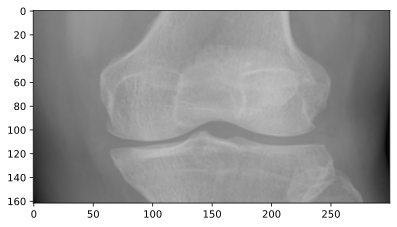

In [11]:
first_xray = (train_path + '0\\' + 'NormalG0 (1).png')
plt.imshow(imread(first_xray), cmap = 'gray')

# Counting the amount of data after augmentation

In [16]:
for i in os.listdir(train_path):
    print(f'{i}: {len(os.listdir(train_path + i))}')

0: 428
1: 428
2: 428
3: 428
4: 428


In [17]:
for i in os.listdir(test_path):
    print(f'{i}: {len(os.listdir(test_path + i))}')

0: 75
1: 75
2: 75
3: 75
4: 75


# Pushing the dimensions into an array and plotting it

In [19]:
dim1 = []
dim2 = []

for i in os.listdir(test_path):
    for image_filename in os.listdir(test_path + i):
        img = imread(test_path + i + '\\' + image_filename)
        # print(img.shape)
        # d1, d2 = img.shape
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

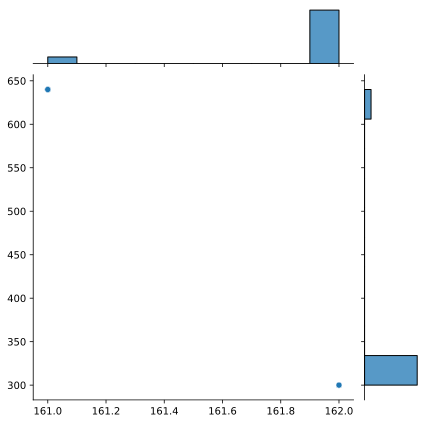

In [22]:
sns.jointplot(x = dim1, y = dim2)
plt.savefig('ImgDim.png')

# Calculating the mean

In [21]:
print(np.mean(dim1), np.mean(dim2))

161.89066666666668 337.17333333333335


# Hardcoding image shape to use while model training

In [23]:
IMG_SHAPE = (160, 335, 1)

# Taking the data and randomly augmenting it to deal with unique data

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(brightness_range = [0.2, 1.0],
                                rotation_range = 20, 
                                rescale = 1 / 255,
                                shear_range = 0.1,
                                zoom_range = 0.1,
                                horizontal_flip = True,
                                vertical_flip = True,
                                fill_mode = 'nearest')

In [26]:
image_gen.flow_from_directory(train_path)

Found 2140 images belonging to 5 classes.


In [27]:
image_gen.flow_from_directory(test_path)

Found 375 images belonging to 5 classes.


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import categorical_crossentropy

# 1. Using AlexNet Architecture

In [26]:
AlexNetModel = Sequential()

AlexNetModel.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=IMG_SHAPE))
AlexNetModel.add(BatchNormalization())

AlexNetModel.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
AlexNetModel.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"))
AlexNetModel.add(BatchNormalization())

AlexNetModel.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
AlexNetModel.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
AlexNetModel.add(BatchNormalization())

AlexNetModel.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
AlexNetModel.add(BatchNormalization())

AlexNetModel.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"))
AlexNetModel.add(BatchNormalization())
AlexNetModel.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

AlexNetModel.add(Flatten())

AlexNetModel.add(Dense(4096, activation='relu'))
AlexNetModel.add(Dropout(0.5))

AlexNetModel.add(Dense(4096, activation='relu'))
AlexNetModel.add(Dropout(0.5))

AlexNetModel.add(Dense(5, activation='softmax'))

AlexNetModel.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

AlexNetModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 82, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 38, 82, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 18, 40, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 40, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 18, 40, 256)      1024      
 hNormalization)                                                 
                                                        

c:\Users\subhr\anaconda3\envs\tf2.10\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
BATCH_SIZE = 16

In [30]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size = IMG_SHAPE[:2],
                                                color_mode = 'rgb',
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'categorical',
                                                shuffle = True)

Found 2140 images belonging to 5 classes.


In [31]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size = IMG_SHAPE[:2],
                                                color_mode = 'rgb',
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'categorical',
                                                shuffle = False)

Found 375 images belonging to 5 classes.


In [32]:
train_image_gen.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

# Creating Callbacks

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

* Checkpoint Saving

In [25]:
saveCheckpointsPath = "AlexNetSavedModels/improved-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(saveCheckpointsPath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

* Making an Early Stop

In [45]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

# Loging in an CSV

In [27]:
log_csv = CSVLogger("Logs/AlexNetLogs.csv", separator = ',', append = False)

# Training the model

In [35]:
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



In [36]:
AlexNetResults = AlexNetModel.fit(train_image_gen, epochs = 100, 
                    validation_data = test_image_gen,
                    callbacks = [checkpoint, early_stop, log_csv])

Epoch 1/100
67/67 [==============================] - ETA: 0s - loss: 2.8068 - accuracy: 0.2178
Epoch 1: val_accuracy improved from -inf to 0.16800, saving model to AlexNetSavedModels\improved-01-0.17.hdf5
67/67 [==============================] - 52s 643ms/step - loss: 2.8068 - accuracy: 0.2178 - val_loss: 1.6142 - val_accuracy: 0.1680
Epoch 2/100
67/67 [==============================] - ETA: 0s - loss: 2.3977 - accuracy: 0.2308
Epoch 2: val_accuracy improved from 0.16800 to 0.20533, saving model to AlexNetSavedModels\improved-02-0.21.hdf5
67/67 [==============================] - 38s 567ms/step - loss: 2.3977 - accuracy: 0.2308 - val_loss: 1.6357 - val_accuracy: 0.2053
Epoch 3/100
67/67 [==============================] - ETA: 0s - loss: 2.2311 - accuracy: 0.2481
Epoch 3: val_accuracy did not improve from 0.20533
67/67 [==============================] - 38s 569ms/step - loss: 2.2311 - accuracy: 0.2481 - val_loss: 1.7439 - val_accuracy: 0.2000
Epoch 4/100
67/67 [==========================

In [33]:
import pickle

In [38]:
with open('AlexNetTrainingHistory/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(AlexNetResults.history, file_pi)

In [34]:
with open('TrainingHistory/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

# Ploting the accuracy graph

In [35]:
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

train_loss = history['loss']
val_loss = history['val_loss']

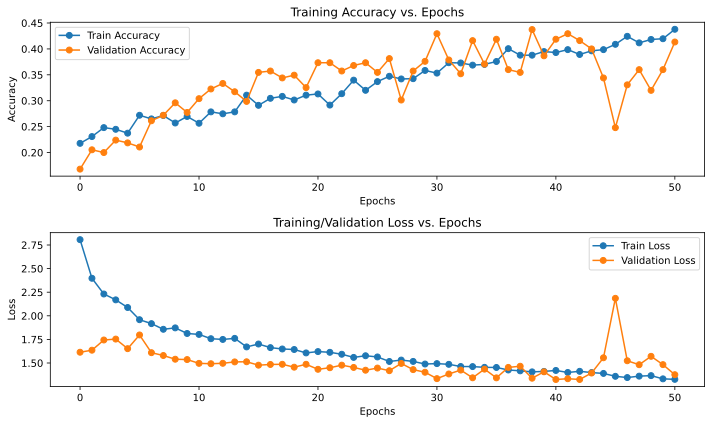

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
# plt.savefig('AlexNetPlot.png')
plt.show()

# AlexNet Model Metrics

In [38]:
from tensorflow.keras.models import load_model

In [39]:
AlexNetModelLoad = load_model('AlexNetSavedModels/improved-39-0.44.hdf5')

: 

: 

In [73]:
AlexNetModelLoad.save('AlexNet.hdf5')

In [56]:
accuracy_scores=np.zeros(3)
vaL_loss, val_accuracy= AlexNetModelLoad.evaluate(test_image_gen, verbose=0)
train_loss, train_accuracy= AlexNetModelLoad.evaluate(train_image_gen, verbose=0)
print("test loss:", vaL_loss,)
print("test accuracy:",val_accuracy*100,"%")
print("train loss:", train_loss)
accuracy_scores[0]=train_accuracy
print("train accuracy:",train_accuracy*100,"%")


test loss: 1.3809106349945068
test accuracy: 40.00000059604645 %
train loss: 1.3265349864959717
train accuracy: 43.59813034534454 %


# Prediction and Metrics

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
pred = AlexNetModelLoad.predict(test_image_gen)

12/12 [==============================] - 6s 458ms/step


In [58]:
labels = {value: key for key, value in train_image_gen.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : 0
1 : 1
2 : 2
3 : 3
4 : 4


In [59]:
y_pred = np.argmax(pred, axis = 1)
y_test = test_image_gen.classes

In [61]:
print(classification_report(y_test, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

           0       0.23      0.12      0.16        75
           1       0.46      0.41      0.44        75
           2       0.32      0.25      0.28        75
           3       0.49      0.44      0.46        75
           4       0.44      0.83      0.57        75

    accuracy                           0.41       375
   macro avg       0.39      0.41      0.38       375
weighted avg       0.39      0.41      0.38       375



In [62]:
print()

[[ 9 24 19 11 12]
 [11 31  8  2 23]
 [13  6 19 18 19]
 [ 5  1 11 33 25]
 [ 1  5  3  4 62]]


<Axes: >

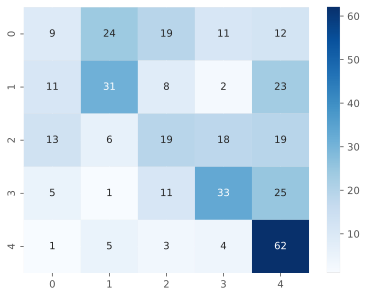

In [64]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')

# Calculating the class weights

In [46]:
from sklearn.utils.class_weight import compute_class_weight

In [47]:
y_train = train_image_gen.labels
y_test = test_image_gen.labels

In [48]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train: ", dict(zip(unique, counts)))

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

Train:  {0: 428, 1: 428, 2: 428, 3: 428, 4: 428}
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


In [49]:
plateau = tf.keras.callbacks.ReduceLROnPlateau(
                monitor='loss', factor=0.1, min_delta=0.01, 
                min_lr=1e-10, patience=4, mode='auto'
            )

# Using Shared Learning with Xception Model

In [50]:
XceptionModel = tf.keras.applications.xception.Xception(
    input_shape=(160, 335, 3),
    include_top=False,
    weights="imagenet",
)

for layer in XceptionModel.layers:
    layer.trainable = True

model_ft = tf.keras.models.Sequential(
    [
        XceptionModel,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation="softmax"),
    ]
)

model_ft.summary()

model_ft.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 11, 2048)       20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 20,871,725
Trainable params: 20,817,197
Non-trainable params: 54,528
_________________________________________________________________


# Creating Callbacks

* Checkpoint Saving

In [51]:
saveCheckpointsPath = "XceptionSavedModels/improved-{epoch:02d}-{val_accuracy:.2f}.hdf5"
Xceptioncheckpoint = ModelCheckpoint(saveCheckpointsPath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

* Logging Accuracy and Loss Data into a CSV

In [55]:
logXception = CSVLogger("XceptionLogs.csv", separator = ',', append = False)

# Training the model

In [53]:
sess = tf.compat.v1.Session(config = tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



In [56]:
history = model_ft.fit(
    train_image_gen,
    epochs=100,
    callbacks=[early_stop, Xceptioncheckpoint, logXception],
    validation_data=test_image_gen,
    class_weight=train_class_weights,
    verbose=1,
)

Epoch 1/100
134/134 [==============================] - ETA: 0s - loss: 1.0435 - accuracy: 0.5687
Epoch 1: val_accuracy improved from 0.32533 to 0.44000, saving model to XceptionSavedModels\improved-01-0.44.hdf5
134/134 [==============================] - 45s 332ms/step - loss: 1.0435 - accuracy: 0.5687 - val_loss: 3.2209 - val_accuracy: 0.4400
Epoch 2/100
134/134 [==============================] - ETA: 0s - loss: 0.8990 - accuracy: 0.6416
Epoch 2: val_accuracy did not improve from 0.44000
134/134 [==============================] - 45s 332ms/step - loss: 0.8990 - accuracy: 0.6416 - val_loss: 4.9478 - val_accuracy: 0.2800
Epoch 3/100
134/134 [==============================] - ETA: 0s - loss: 0.8527 - accuracy: 0.6626
Epoch 3: val_accuracy improved from 0.44000 to 0.62933, saving model to XceptionSavedModels\improved-03-0.63.hdf5
134/134 [==============================] - 49s 361ms/step - loss: 0.8527 - accuracy: 0.6626 - val_loss: 0.9484 - val_accuracy: 0.6293
Epoch 4/100
134/134 [=======

# Saving the model

In [155]:
model_ft.save('XceptionModel.hdf5')

: 

In [69]:
model_ft.metrics_names

['loss', 'accuracy']

In [68]:
model_ft.evaluate(test_image_gen)

24/24 [==============================] - 7s 235ms/step - loss: 1.0944 - accuracy: 0.7040


[1.0943940877914429, 0.7039999961853027]

In [77]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

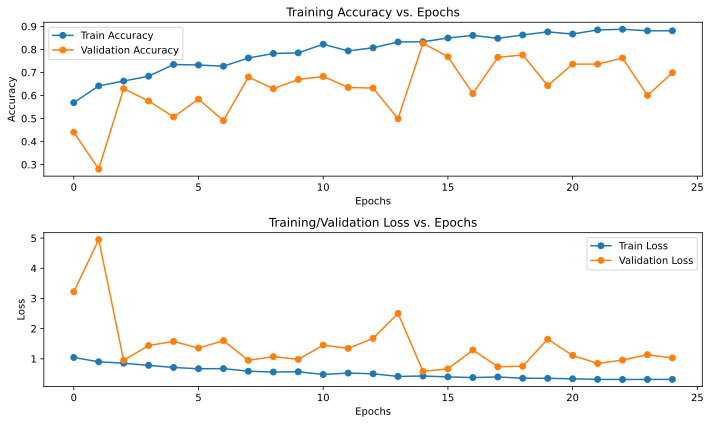

In [79]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

# Pickling the history 

In [58]:
import pickle

In [64]:
with open('TrainingHistory/XceptionHistory', 'wb') as file_pi:
    pickle.dump(model_ft.history, file_pi)

INFO:tensorflow:Assets written to: ram://f0b4f52f-ecd9-4a2d-a8be-61e22ad8001b/assets


INFO:tensorflow:Assets written to: ram://f0b4f52f-ecd9-4a2d-a8be-61e22ad8001b/assets


# Loading the last Checkpoint with better accuracy

In [2]:
from tensorflow.keras.models import load_model

In [3]:
LoadedModel = load_model('XceptionSavedModels/improved-15-0.83.hdf5')

# Evaluating the Test Data

In [4]:
LoadedModel.metrics_names

['loss', 'accuracy']

In [5]:
LoadedModel.evaluate(test_image_gen)

NameError: name 'test_image_gen' is not defined

# Metrics

In [2]:
import pandas as pd

In [16]:
df = pd.read_csv('Xceptionlogs.csv')

In [17]:
train_accuracy = df['accuracy']
val_accuracy = df['val_accuracy']

train_loss = df['loss']
val_loss = df['val_loss']

# Plotting the graphs

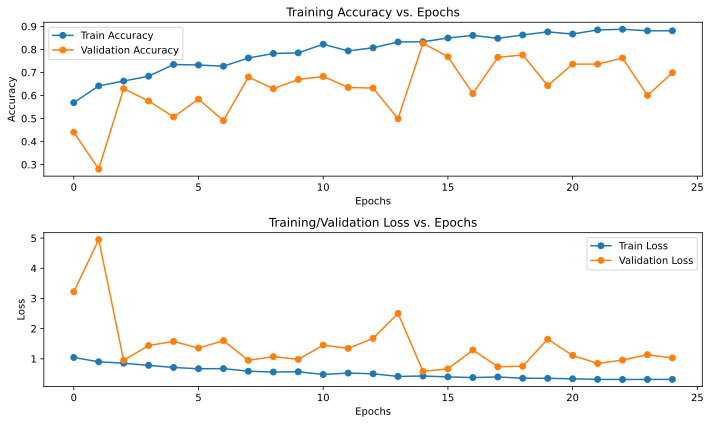

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.savefig('XceptionPlot.png')
plt.show()

# Predicting the Test Data and Metrics

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
pred = LoadedModel.predict(test_image_gen)

NameError: name 'LoadedModel' is not defined

In [84]:
labels = {value: key for key, value in train_image_gen.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : 0
1 : 1
2 : 2
3 : 3
4 : 4


In [102]:
y_pred = np.argmax(pred, axis = 1)
y_test = test_image_gen.classes

In [103]:
print(classification_report(y_test, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

           0       0.77      0.83      0.79        75
           1       0.81      0.63      0.71        75
           2       0.73      0.84      0.78        75
           3       0.86      0.79      0.82        75
           4       0.83      0.89      0.86        75

    accuracy                           0.79       375
   macro avg       0.80      0.79      0.79       375
weighted avg       0.80      0.79      0.79       375



In [104]:
print(confusion_matrix(y_test, y_pred))

[[62  4  7  2  0]
 [18 47  8  0  2]
 [ 1  3 63  5  3]
 [ 0  1  6 59  9]
 [ 0  3  2  3 67]]


<Axes: >

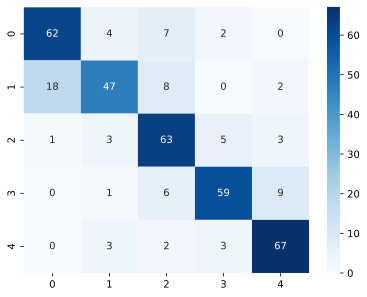

In [105]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, linecolor = 'white', cmap = 'Blues')

In [106]:
new_pred = model_ft.predict(test_image_gen)

24/24 [==============================] - 6s 244ms/step


In [107]:
new_y_pred = np.argmax(pred, axis = 1)
new_y_test = test_image_gen.classes

In [108]:
print(classification_report(new_y_test, new_y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

           0       0.77      0.83      0.79        75
           1       0.81      0.63      0.71        75
           2       0.73      0.84      0.78        75
           3       0.86      0.79      0.82        75
           4       0.83      0.89      0.86        75

    accuracy                           0.79       375
   macro avg       0.80      0.79      0.79       375
weighted avg       0.80      0.79      0.79       375



<Axes: >

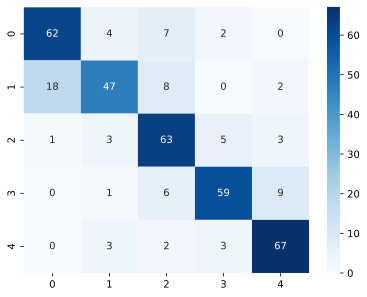

In [109]:
sns.heatmap(confusion_matrix(new_y_test, new_y_pred), annot = True, cmap = 'Blues')

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

# Prediting Unseen values

In [ ]:
dict = {
    0 : "Normal",
    1 : "Doubtful",
    2 : "Mild",
    3 : "Moderate",
    4 : "Severe",
}

In [140]:
import cv2
def SeverityChecker(img):
    resize = tf.image.resize(img, (160, 335))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    yhat = LoadedModel.predict(np.expand_dims(resize / 255, 0))
    yhat = np.argmax(yhat, axis = 1)
    if yhat[0] in dict:
        print(dict[yhat[0]])

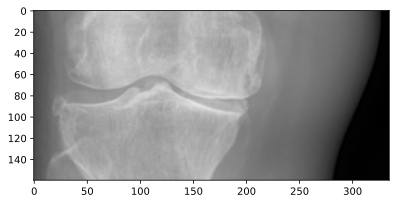

1/1 [==============================] - 0s 31ms/step
Moderate


In [154]:
img = cv2.imread('Testing/Moderate-3/ModerateG3 (142).png')
SeverityChecker(img)